

# Test this claim



## $P_k$ and the degenerate systems claim

The metric $P_k$ from [@beef_stat99] is a simpler version from the metric $PD$ by the same authors [refneeded]. $PD$ is is the probability that two sentences drawn randomly from the corpus are correctly identified (as belonging to the same document or to different documents). The much easier to implement version $P_k$ is described by  Pevzner and Hearst [@pevz_grit02] as follows: "$P_k$ is calculated by setting $k$ to half of the average true segment size and then computing penalties via a moving window of length $k$. At each location, the algorithm determines whether the two ends of the probe are in the same or different segments in the reference segmentation and increases a counter if the algorithm's segmentation disagrees. The resulting count is scaled between 0 and 1 by dividing by the number of measurements taken". 

$PD$ has a clear intuitive and mathematically sound meaning, but is hard to compute. The easy to implement  $P_k$ is also easily understood, but it is not immediate that it is a natural metric for sementation problems. Indeed the 5th problem Pevzner and Hearst indicate for $P_k$ ---and the only one that is not solved by their *WindowDiff* repair--- is that it is not clear what the scores mean [@pevz_grit02]. 
But [@beef_stat99] contains another justification for $P_k$: 

> It turns out empirically, and can be shown analytically (under strong assumptions), that if the window k is chosen to be half the average reference segment length (in words), then all of the major “degenerate” algorithms—hypothesizing boundaries everywhere, uniformly, randomly, and not at all—have nearly the same low score of Pk ≡ PDk ≈ 1/2 (Figure 12). With this justification, we use the error metric Pk
in our quantitative analysis.


We will now  test whether the emperical part of this claim holds on a large PSS dataset. We test it not just for $P_k$ but also for the later suggested improvements. We answer the following questions:
 
1.   Does the claim about the degenerate segmenters all scoring roughly  $P_k=.5$ on real world datasets also hold for page segmentation datasets, when the items are much coarser (i.e., pages instead of words)?
2.    Does the same hold for suggested improvements of $P_k$, in particular WindowDiff and WinPR?
3.   What is the influence of the value of $k$ on the claim?
4.   What is the influence of the padding improvement suggested by [Lamprier (2008)].
<!-- 5. <strike>What is the influence of not counting the first page of a stream as a boundary? This sounds reasonable as the first page is always a boundary, so why to give an segmenter credit for having that correct.</strike>  * Hardly any influence, except on all boundaries, whose error goes up.   --> 

We answer the questions using the WooIR $D1$ dataset  from [@heus_wooi23] which contains 333 streams with in total 31.293 pages and 134.460 pages. We consider 5 "degenerate" non-learned baselines: every page is a cluster (all), the whole stream is one cluster (none), two uniformly spaced clusterings, based on the mean and median document length in the stream, respectively (the last cluster may be shorter), and a random baseline.
The random prediction is created as follows: given the stream length, first randomly determine the number of documents in the stream, and then, making sure the stream is filled correctly, randomly assign a  length to each document. All these "degenerate" systems are in fact rule based baselines whose rules rely only on priors measured at the level of the corpus. 

The effect of the padding suggested by Lamprier et.al [@lamp_eval08] was absent for all 5 baselines except random, for which the difference in mean scores was at most $.008$ (for mean precision). Because the  padding makes intuitive sense, we do all experiments with this so-called Lamprier padding.

For the first question, Tabel 1 contains the results for $P_k$. Figure 1 shows the corresponding population density plots for the 333 streams. On this dataset, the claim only holds for the random system and the system which makes every page a seperate cluster. The mean system is already a strong baseline with  $P_k=.39$. Recall that $P_k$ is an error score, so lower is better. 


**Table 1: Mean $P_k$ per stream (N=333), for the 5 degenerate segmentation methods.**

|        |   mean |   std |
|:-------|-------:|------:|
| all    |   0.49 |  0.15 |
| none   |   0.42 |  0.2  |
| median |   0.42 |  0.21 |
| mean   |   0.39 |  0.17 |
| random |   0.49 |  0.16 |

**Figure 1: Population density plots for  $P_k$ per stream (N=333), for the 5 degenerate segmentation methods.**
![](Pk_experiment.png)

The answer to the second question is given in Table 2 and Figure 2. Note that WinPR is an F1 measure, so higher is better, and WindowDiff is an error measure as $P_k$. For both measures, the means are spread  much more over the five degenerates than for $P_k$, and are even further removed from the desired "middle" error value. So, we can conclude that these two metrics repair certain shortcomings of $P_k$, but in doing so seem to destroy the justification for using $P_k$.


**Table 2: Mean $P_k$, WinPR and WindowDiff per stream (N=333), for the 5 degenerate segmentation methods.**


|        |   Pk |   WinPR |   WindowDiff |
|:-------|-----:|--------:|-------------:|
| all    | 0.49 |    0.4  |         0.88 |
| none   | 0.42 |    0.22 |         0.43 |
| median | 0.42 |    0.62 |         0.52 |
| mean   | 0.39 |    0.59 |         0.45 |
| random | 0.49 |    0.44 |         0.67 |

**Figure 2: Population density plots for  WinPR and WindowDiff per stream (N=333), for the 5 degenerate segmentation methods.**
![](WindowDiffAndWinPR_experiment.png)

To end,  we look at the influence of the definition of the hyperparameter $k$, the size of the window, on the claim. This parameter is suggested to be set at half the mean cluster size of a sample. So in our case, half of the mean document size in a stream. 
Figure 3 shows the effect of widening the window, and we see that for all degenerates (except no cluster), the mean $P_k$ goes down when we use a wider window. Several papers mention that $k$ is a tuneable hyperparameter. But this experiment shows that indeed with larger windows, the error score goes down, but this seems to be an artefact. In any case, increasing the window size further weakens the justification for $P_k$. 

**Figure 3: the effect of increasing the window size on the mean $P_k$ (N=333).**
![](Kexperiment.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functools as ft

In [2]:
goldstandard= 'all_corpora_gold_standard.json'
f= open(goldstandard)
truth_corpus=json.load(f)
truth_corpus={s:truth_corpus[s] for s in truth_corpus if truth_corpus[s]!=[1]}
#truth_corpus= {s:truth_corpus[s] for s in truth_corpus if len(truth_corpus[s])>0}
print('Nr of streams, documents and pages',len(truth_corpus), sum(len(truth_corpus[s]) for s in truth_corpus) ,sum(sum(truth_corpus[s]) for s in truth_corpus))



Nr of streams, documents and pages 333 31293 134460


In [3]:
# TODO VGL met https://www.nltk.org/_modules/nltk/metrics/segmentation.html


def window_metric(t,p,k,kind='Pk', LamprierPadding=True ):
    '''Compute Pk, WindowDiff or WinPR on a true stream t and a hypothesized stream p
    of the form [6,2,3,8] indicating the length in pages of the  documents in the stream.'''
    # preprocessing
    N= sum(t)
    def to_bit_vector(s):
        tmp= np.concatenate( [[1]+[0]*(i-1) for i in s])
        #tmp[0]=0  # different from us, the first page is not a boundary
        return tmp
    def padding(s,pads):
        if pads.size>0:
            return np.concatenate((pads,s,pads))
        else: return s
    if LamprierPadding:
        pad = np.zeros(k-1).astype(int) if k>1 else np.array([])  # we pad k-1 0 before and after the stream
    else:
        pad = np.array([])
    t,p= padding(to_bit_vector(t),pad), padding(to_bit_vector(p),pad)
    # now choose which metric to compute
    if kind=='Pk':
        miss= sum( sum(t[i:i+k+1])>0 and sum(p[i:i+k+1])==0 for i in range(N+k-1))
        false_alarm= sum( sum(t[i:i+k+1])==0 and sum(p[i:i+k+1])>0 for i in range(N+k-1) )
        result= np.array([ false_alarm, miss, miss+false_alarm])/(N+k-1) 
    elif kind=='WindowDiff':
        miss= sum( sum(t[i:i+k+1]) > sum(p[i:i+k+1]) for i in range(N+k-1))
        false_alarm= sum( sum(t[i:i+k+1]) < sum(p[i:i+k+1]) for i in range(N+k-1))
        result= np.array([ false_alarm, miss, miss+false_alarm])/(N+k-1) 
    elif kind=='WinPR':
        TP= sum((min(sum(t[i:i+k+1]),sum(p[i:i+k+1]))) for i in range(N+k-1))
        FP= sum((max(0, sum(p[i:i+k+1])-sum(t[i:i+k+1]))) for i in range(N+k-1))
        FN= sum((max(0, sum(t[i:i+k+1])-sum(p[i:i+k+1]))) for i in range(N+k-1))
        result= np.array([TP/(TP+FP), TP/(TP+FN), TP/(TP + .5*(FP+FN))]) 
    return  result
 

In [4]:
def fixedpage(stream,docsize=1): 
    number_of_blocks= sum(stream)//docsize
    rest = sum(stream) % docsize
    if rest !=0:
        return [docsize for _ in range(number_of_blocks)]+[rest]
    else:
        return [docsize for _ in range(number_of_blocks)]        
    
fixedpage([6,5,4])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [5]:
from random import randint

# Function to generate a list of
# m random positive integers
# whose sum is n
def randomList(m, n):
    arr = np.ones(m) 
    # To make the sum of the final list as n
    for i in range(n-m) :
        # Increment any random element
        # from the array by 1
        arr[randint(0, n) % m] += 1;
    return arr.astype(int)

randomList(4,8)

def random1(t):
        '''generates a random stream with as many docs and pages as t '''
        raw= randomList(len(t),sum(t))
        return [i for i in raw ]
 
def random2(t):
    '''generates a random stream with as   pages as t '''
    aantal_boundaries= randint(1,max(2,sum(t)-1))
    return [i for i in randomList(aantal_boundaries,sum(t)) ]

#t=[2,3,3]
#[random1(t) for _ in range(10)]

In [6]:
def degenerate_segmenter(stream,kind):
    '''match kind:
        case 'all':
            return fixedpage(stream,1)
        case 'none':
            return fixedpage(stream,sum(stream))
     '''
    if kind=='all':
        return fixedpage(stream,1)
    elif kind=='none':
        return fixedpage(stream,sum(stream))
    elif kind=='median':
        return fixedpage(stream,int(round(np.median(stream)) ))
    elif kind=='mean':
        return fixedpage(stream,int(round(np.mean(stream)) ))
    elif kind=='random1':
        return random1(stream)
    elif kind=='random':
        return random2(stream)
    
[ degenerate_segmenter([1,2,6],t) for t in ['all','none','median','mean','random1','random']]

[[1, 1, 1, 1, 1, 1, 1, 1, 1],
 [9],
 [2, 2, 2, 2, 1],
 [3, 3, 3],
 [3, 3, 3],
 [2, 3, 1, 1, 1, 1]]

In [10]:
degenerates= ['all','none','median','mean','random'] #'random1',

def big_experiment(data,extra_k=0, k_func=np.mean, LamprierPadding=True, metric='Pk' ):
    truth_corpus=data
    #truth_corpus= {s:truth_corpus[s] for s in truth_corpus if len(truth_corpus[s])>0}
    DFs=[]
    for kind in degenerates:
        D ={pdf: window_metric(truth_corpus[pdf], 
                    degenerate_segmenter(truth_corpus[pdf],kind),  # every page
                    int(k_func(truth_corpus[pdf])//2) + extra_k,
                    kind=metric,
                    LamprierPadding=LamprierPadding
                   )
           for pdf in truth_corpus}
        results= pd.DataFrame.from_dict(D,orient='index')
        #results.index.name=kind
        results.columns=[(kind,m) for m in ['P','R','F1']]
        DFs.append(results)
    
    df = ft.reduce(lambda left, right: pd.merge(left, right,left_index=True,right_index=True), DFs, )
    df.columns=pd.MultiIndex.from_tuples(df.columns)
    return df

df=big_experiment(truth_corpus)

In [17]:
tabel= df.loc[:, (degenerates, ['F1'])]
tabel.columns= tabel.columns.droplevel(1)
print(tabel.describe().T[['mean','std']].round(2).to_markdown())

|        |   mean |   std |
|:-------|-------:|------:|
| all    |   0.49 |  0.15 |
| none   |   0.42 |  0.2  |
| median |   0.42 |  0.21 |
| mean   |   0.39 |  0.17 |
| random |   0.48 |  0.16 |


In [ ]:
dfPK=df.loc[:, (degenerates, ['F1'])]
dfPK.columns=degenerates
#plt.figure(figsize = (15,8))
fig, ax =plt.subplots(1,2, figsize=(18,5))
sns.kdeplot(data=dfPK,ax=ax[0],clip=(0,1));
sns.boxplot(data=dfPK,ax=ax[1]);
print('N=',df.shape[0])
plt.savefig('Pk_experiment.png')
dfPK.mean()

In [ ]:
dfPK=df.loc[:, (degenerates, ['F1'])]
dfPK.columns=degenerates
#plt.figure(figsize = (15,8))
#fig, ax =plt.subplots(1,2, figsize=(18,5))
sns.kdeplot(data=dfPK, clip=(0,1));
#sns.boxplot(data=dfPK,ax=ax[1]);
print('N=',df.shape[0])
plt.savefig('Pk_experiment.png')
Pkmean= dfPK.mean()
Pkmean

# What about WindowDiff and WinPR

* Note that Pk and WindowDiff are error measures (so 0 is good, 1 is worst)
* but WinPR is the other way around and F=1 is best and 0 = worst.

In [ ]:
df=big_experiment(truth_corpus, metric='WindowDiff')
dfPK=df.loc[:, (degenerates, ['F1'])]
dfPK.columns=degenerates
#plt.figure(figsize = (15,8))
fig, ax =plt.subplots(1,2, figsize=(18,5))
sns.kdeplot(data=dfPK,ax=ax[0],clip=(0,1));
sns.boxplot(data=dfPK,ax=ax[1]);
print('WindowDiff','N=',df.shape[0])
dfPK.mean()

In [ ]:
m='WinPR'
df=big_experiment(truth_corpus, metric=m)
dfPK=df.loc[:, (degenerates, ['F1'])]
dfPK.columns=degenerates


#plt.figure(figsize = (15,8))
fig, ax =plt.subplots(1,2, figsize=(18,5))
sns.kdeplot(data=dfPK,ax=ax[0],clip=(0,1));
sns.boxplot(data=dfPK,ax=ax[1]);
print(m,'N=',df.shape[0])
dfPK.mean()

In [ ]:
m='WinPR'
dfPR=big_experiment(truth_corpus, metric=m)
dfPK1=dfPR.loc[:, (degenerates, ['F1'])]
dfPK1.columns=degenerates



dfWD=big_experiment(truth_corpus, metric='WindowDiff')
dfPK2=dfWD.loc[:, (degenerates, ['F1'])]
dfPK2.columns=degenerates

In [ ]:
plt.figure(figsize = (15,8));
fig, ax =plt.subplots(1,2, figsize=(18,5));
winPR=sns.kdeplot(data=dfPK1, ax=ax[0], clip=(0,1));
winDiff=sns.kdeplot(data=dfPK2, ax=ax[1], clip=(0,1));
winPR.set(xlabel='WinPR')
winDiff.set(xlabel='WindowDiff')
#sns.boxplot(data=dfPK,ax=ax[1]);
print('N=',df.shape[0])
plt.savefig('WindowDiffAndWinPR_experiment.png')
MM= pd.DataFrame(Pkmean).join(pd.DataFrame(dfPK1.mean()).join(pd.DataFrame(dfPK2.mean()),rsuffix='r'),rsuffix='l').round(2)
MM.columns=['Pk','WinPR','WindowDiff']
print(MM.to_markdown())

# Influence of k

* Doclengths are lognormally distributed


### outcome

* Hardly any influence, half the mean doclength of a stream is for all except "no boundaries"  the best.

count    333.00
mean       8.81
std       17.31
min        1.00
25%        2.52
50%        3.78
75%        7.45
max      151.00
dtype: float64

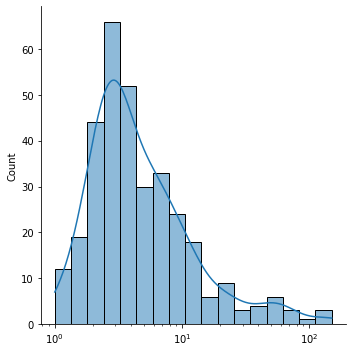

In [19]:
D=truth_corpus
MeanDoclengths= pd.Series([np.mean(D[s]) for s in D])
sns.displot(MeanDoclengths, kde=True,log_scale=(True,False));
MeanDoclengths.describe().round(2)

In [20]:
extrak=  list(range(0,11)) #list(range(-10,0))+
#extrak=range(0,11)
extrak

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
%%time
frames={k:big_experiment(truth_corpus,extra_k=k) for k in extrak}

CPU times: user 1min 49s, sys: 577 ms, total: 1min 49s
Wall time: 1min 50s


In [27]:
frames[0].loc[:, (degenerates, ['F1'])]
k_experiment= pd.DataFrame({i:frames[i].loc[:, (degenerates, ['F1'])].mean() for i in frames}).T
k_experiment.columns=k_experiment.columns.droplevel(1)
k_experiment

,all,none,median,mean,random
0,0.494341,0.421143,0.423751,0.392598,0.498868
1,0.391485,0.507430,0.333966,0.311910,0.415707
2,0.335803,0.538650,0.284344,0.268568,0.359069
3,0.297993,0.556683,0.251222,0.240077,0.323207
4,0.270837,0.567020,0.227469,0.218804,0.291332
5,0.250071,0.573057,0.209197,0.202159,0.280322
6,0.232829,0.577148,0.194245,0.188312,0.259109
7,0.218514,0.579551,0.182020,0.176765,0.237036
8,0.206390,0.580768,0.171707,0.166911,0.216491
9,0.196140,0.580944,0.162999,0.158573,0.217961


all       0
none      9
median    0
mean      0
random    0
dtype: int64

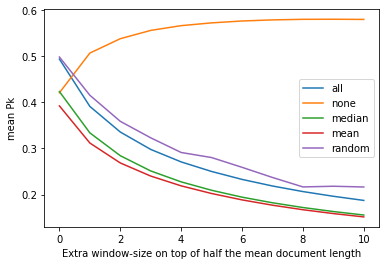

In [28]:
fig=k_experiment.plot()
fig.set(xlabel='Extra window-size on top of half the mean document length', ylabel='mean Pk')
plt.savefig('Kexperiment.png')
k_experiment.idxmax()


# padding experiment

1. For the all, none, mean and median degenerates, padding made no difference in scores for not a single stream. 
2. For the 2 random degenerates, the differences in mean scores are very small, 

In [ ]:
df=big_experiment(truth_corpus)
df_nopadding= big_experiment(truth_corpus,LamprierPadding=False)
(df-df_nopadding).sum()

In [ ]:
df.mean()-df_nopadding.mean()

# P, R, F1 based measures

* We do the same but now for other measures

In [ ]:
from  metricutils import *

t= list(truth_corpus.items())[0][1]
def to_bit_vector(s):
        tmp= np.concatenate( [[1]+[0]*(i-1) for i in s])
        #tmp[0]=0  # different from us, the first page is not a boundary
        return tmp
 

bcubed(to_bit_vector(t),to_bit_vector(degenerate_segmenter(t,kind='none'))).mean()[1:]



In [ ]:
def big_experiment(data,extra_k=0, k_func=np.mean, LamprierPadding=True, metric='Pk' ):
    truth_corpus=data
    #truth_corpus= {s:truth_corpus[s] for s in truth_corpus if len(truth_corpus[s])>0}
    DFs=[]
    for kind in degenerates:
        D ={pdf: window_metric(truth_corpus[pdf], 
                    degenerate_segmenter(truth_corpus[pdf],kind),  # every page
                    int(k_func(truth_corpus[pdf])//2) + extra_k,
                    kind=metric,
                    LamprierPadding=LamprierPadding
                   )
           for pdf in truth_corpus}
        results= pd.DataFrame.from_dict(D,orient='index')
        #results.index.name=kind
        results.columns=[(kind,m) for m in ['P','R','F1']]
        DFs.append(results)
    
    df = ft.reduce(lambda left, right: pd.merge(left, right,left_index=True,right_index=True), DFs, )
    df.columns=pd.MultiIndex.from_tuples(df.columns)
    return df

df=big_experiment(truth_corpus)

# Old stuff

In [ ]:
D={0:[6,5],1:[2,3]}

def multiply(D,k):
    DD=dict()
    for d in D:
        for i in range(k):
            DD[(d,i)]= D[d]
    return DD

multiply(D,2)

In [ ]:
%%time
def experiment(data,kind='Random1',multiple=100):
    f= open(data)
    truth_corpus=json.load(f)
    truth_corpus=multiply(truth_corpus,multiple)
    D ={pdf: Pk(truth_corpus[pdf], 
                 random1(truth_corpus[pdf]),
                int(np.mean(truth_corpus[pdf])//2))
       for pdf in truth_corpus}
    results= pd.DataFrame.from_dict(D,orient='index')
    results.index.name=kind
    results.columns=['FN','FP','Pk']
    return results
    #print(results.shape)
    #print(results.head())
    
    
r= experiment('Doclengths_of_the_individual_docs.json')
print(r.describe())
fig, ax =plt.subplots(1,2)
plt.title='No boundaries'
sns.boxplot(data=r, ax=ax[0]);
sns.histplot(data=r.Pk, kde=True, ax=ax[1]);
#fig.show()

In [ ]:
%%time
def experiment(data,kind='Random2',multiple=100):
    f= open(data)
    truth_corpus=json.load(f)
    truth_corpus=multiply(truth_corpus,multiple)
    D ={pdf: Pk(truth_corpus[pdf], 
                 random2(truth_corpus[pdf]),
                int(np.mean(truth_corpus[pdf])//2))
       for pdf in truth_corpus}
    results= pd.DataFrame.from_dict(D,orient='index')
    results.index.name=kind
    results.columns=['FN','FP','Pk']
    return results
    #print(results.shape)
    #print(results.head())
    
    
r= experiment('Doclengths_of_the_individual_docs.json')
print(r.describe())
fig, ax =plt.subplots(1,2)
plt.title='No boundaries'
sns.boxplot(data=r, ax=ax[0]);
sns.histplot(data=r.Pk, kde=True, ax=ax[1]);
#fig.show()